In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

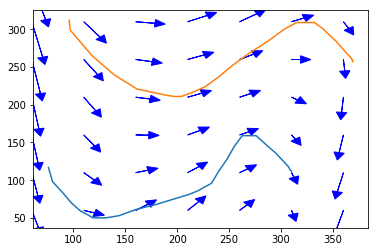

In [33]:
df = pd.read_csv("df.csv")
for i in df["object"].unique():
    dfi = df[df.object == i]
    plt.plot(dfi["x"],dfi["y"])
df["nx"] = df["x"].shift(-1)
df["ny"] = df["y"].shift(-1)
df["n_object"] = df["object"].shift(-1)
df["dx"] = df["nx"] - df["x"]
df["dy"] = df["ny"] - df["y"]
df = df[df["object"] == df["n_object"]]
df["x2"] = df["x"]**2
df["y2"] = df["y"]**2
df["xy"] = df["x"]*df["y"]
df.head()

lin_x = LinearRegression()
lin_y = LinearRegression()
lin_x.fit(df[["x","y","x2","y2","xy"]],df["dx"])
lin_y.fit(df[["x","y","x2","y2","xy"]],df["dy"])

for x in range(10,1000,50):
    for y in range(10,1000,50):
        dx = lin_x.predict([[x,y,x**2,y**2,x*y]])[0]
        dy = lin_y.predict([[x,y,x**2,y**2,x*y]])[0]
        plt.arrow(x,y,dx,dy,color="blue",head_length=10, head_width=10)
plt.show()